In [2]:
import sys
sys.path.append('../')
import importlib
import model.op
importlib.reload(model.op)
from model.op import number_aircrafts_lp
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
from model.ParseLP import convert2df, calculate_num_aircrafts

In [296]:
number_aircrafts_lp(schedule='schedule_5min_0612', schedule_time_step=288, output_path='charge_to_full_after_each_flight', variable_cost=0)

Set parameter MIPGap to value 0.005
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[rosetta2])

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 327016 rows, 345708 columns and 1007684 nonzeros
Model fingerprint: 0x28802ce0
Variable types: 0 continuous, 345708 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 314188 rows and 317648 columns
Presolve time: 0.39s
Presolved: 12828 rows, 28060 columns, 68259 nonzeros
Variable types: 0 continuous, 28060 integer (8112 binary)

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
   19222    5.8000753e+01   1.815007e+04   0.000000e+00      5s
   27412    6.2001405e+01   1.854946e+04   0.000000e+00     10s
   34962    6.2002009e+01   7.157074e

# Cost Sensitivity Analysis

In [8]:
output_file = 'cost_ratio_04_10min'
number_aircrafts_lp(schedule='schedule_10min_0610', schedule_time_step=288, output_path=output_file, tau= variable_cost=0)
specificn, specificu, specificc = convert2df('output_file')
print('Total # of flights is', specificu['amount'].sum())

NameError: name 'convert2df' is not defined

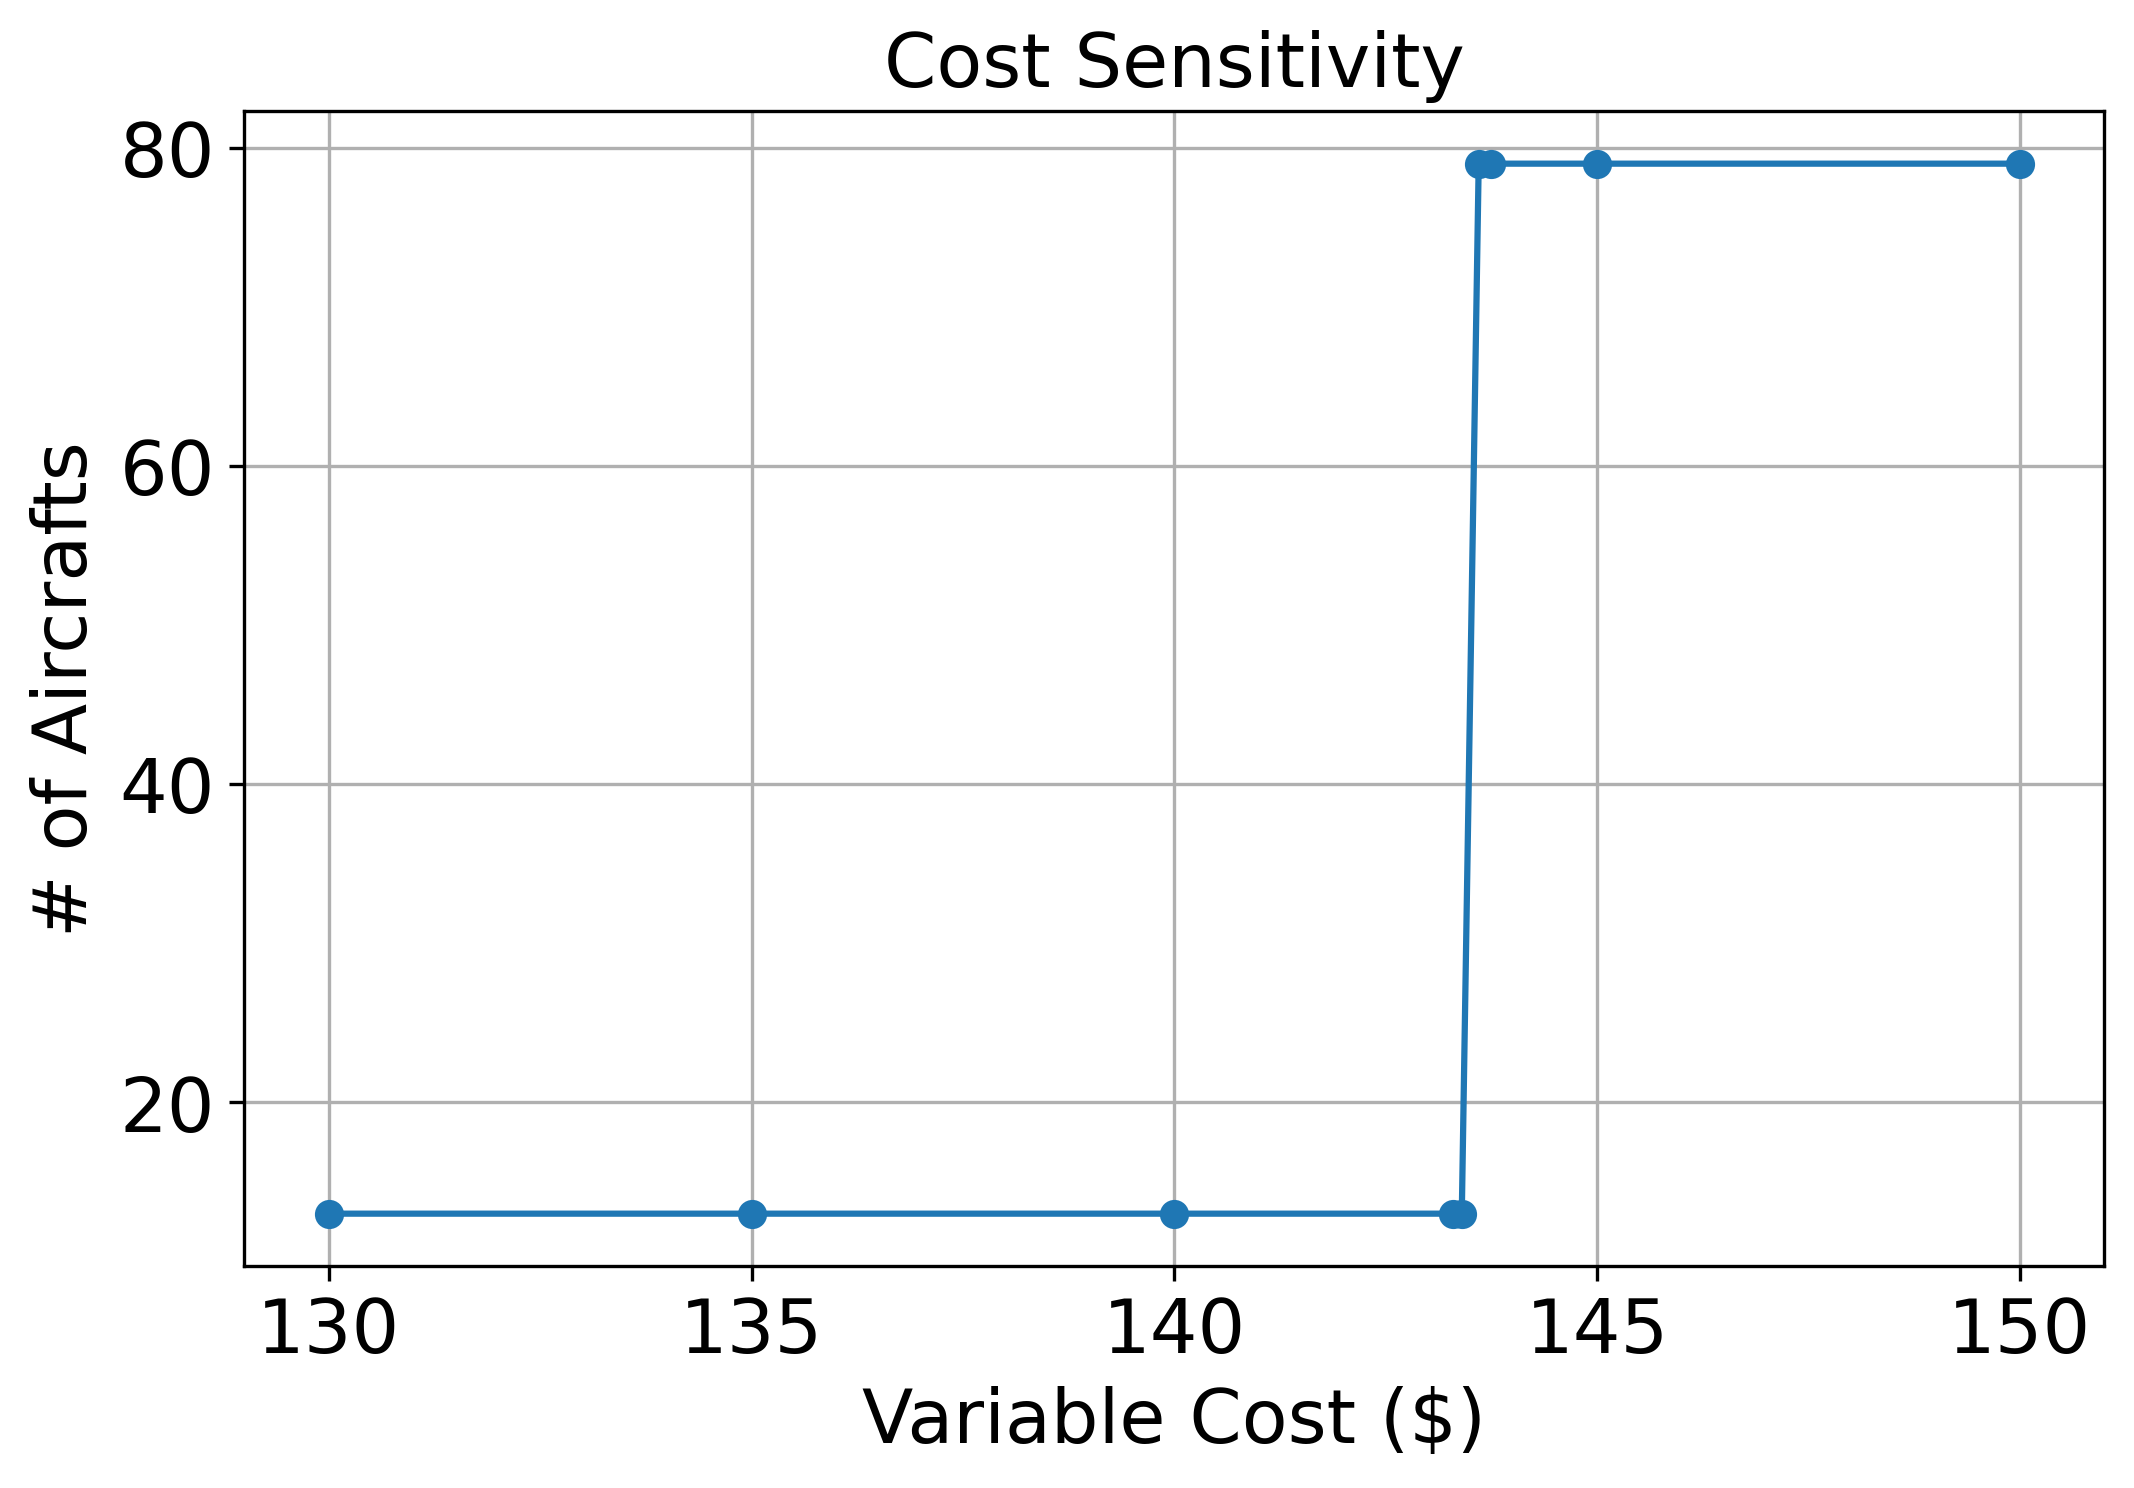

In [24]:
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['axes.titlesize'] = 18
fig, ax = plt.subplots(figsize=(8,5))
vc = [130, 135, 140, 143.3, 143.4, 143.6, 143.75, 145, 150]
n = [13, 13, 13, 13, 13, 79,79,79,79]
ax.plot(vc,n,marker='o')
ax.set(xlabel='Variable Cost ($)', 
       ylabel='# of Aircrafts',
       title='Cost Sensitivity')
plt.grid()
plt.gcf().set_dpi(300)

In [145]:
number_aircrafts_lp(schedule='schedule_5min_2500pax_0713', 
                    schedule_time_step=288, 
                    output_path='trb/schedule_5min_2500pax_0713')

Set parameter Username
Academic license - for non-commercial use only - expires 2024-04-29
Set parameter MIPGap to value 0.005
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[rosetta2])

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 21490 rows, 345708 columns and 703346 nonzeros
Model fingerprint: 0x24392c3e
Variable types: 0 continuous, 345708 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-05, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 8e+00]
Presolve removed 1880 rows and 7236 columns
Presolve time: 0.68s
Presolved: 19610 rows, 338472 columns, 691418 nonzeros
Variable types: 0 continuous, 338472 integer (0 binary)
Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 0.56s

Barrier stati

In [11]:
specificn, specificu, specificc = convert2df('trb/schedule_5min_1500pax_0713')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import seaborn as sns

In [34]:
def find_repo_flights(specificu):

    lp_out = specificu.groupby(['t', 'i']).sum('amount').reset_index()
    lp_out.loc[lp_out['i'] == 0, 'i'] = 'LAX_DTLA'
    lp_out.loc[lp_out['i'] == 1, 'i'] = 'DTLA_LAX'
    schedule = pd.read_csv('../input/schedule_5min_0612.csv')
    schedule['schedule'] = np.ceil(schedule['schedule'] / 5)
    schedule = schedule.groupby(['schedule', 'od']).size().reset_index()
    schedule.columns = ['schedule', 'od', 'schedule_amount']
    merged = schedule.merge(lp_out, how='outer',left_on=['od','schedule'], right_on=['i', 't'])
    merged['repo'] = merged['amount'] - merged['schedule_amount']

    return merged

In [53]:
merged36 = find_repo_flights(specificu=specificu36)
merged48 = find_repo_flights(specificu=specificu48)
merged60 = find_repo_flights(specificu=specificu60)

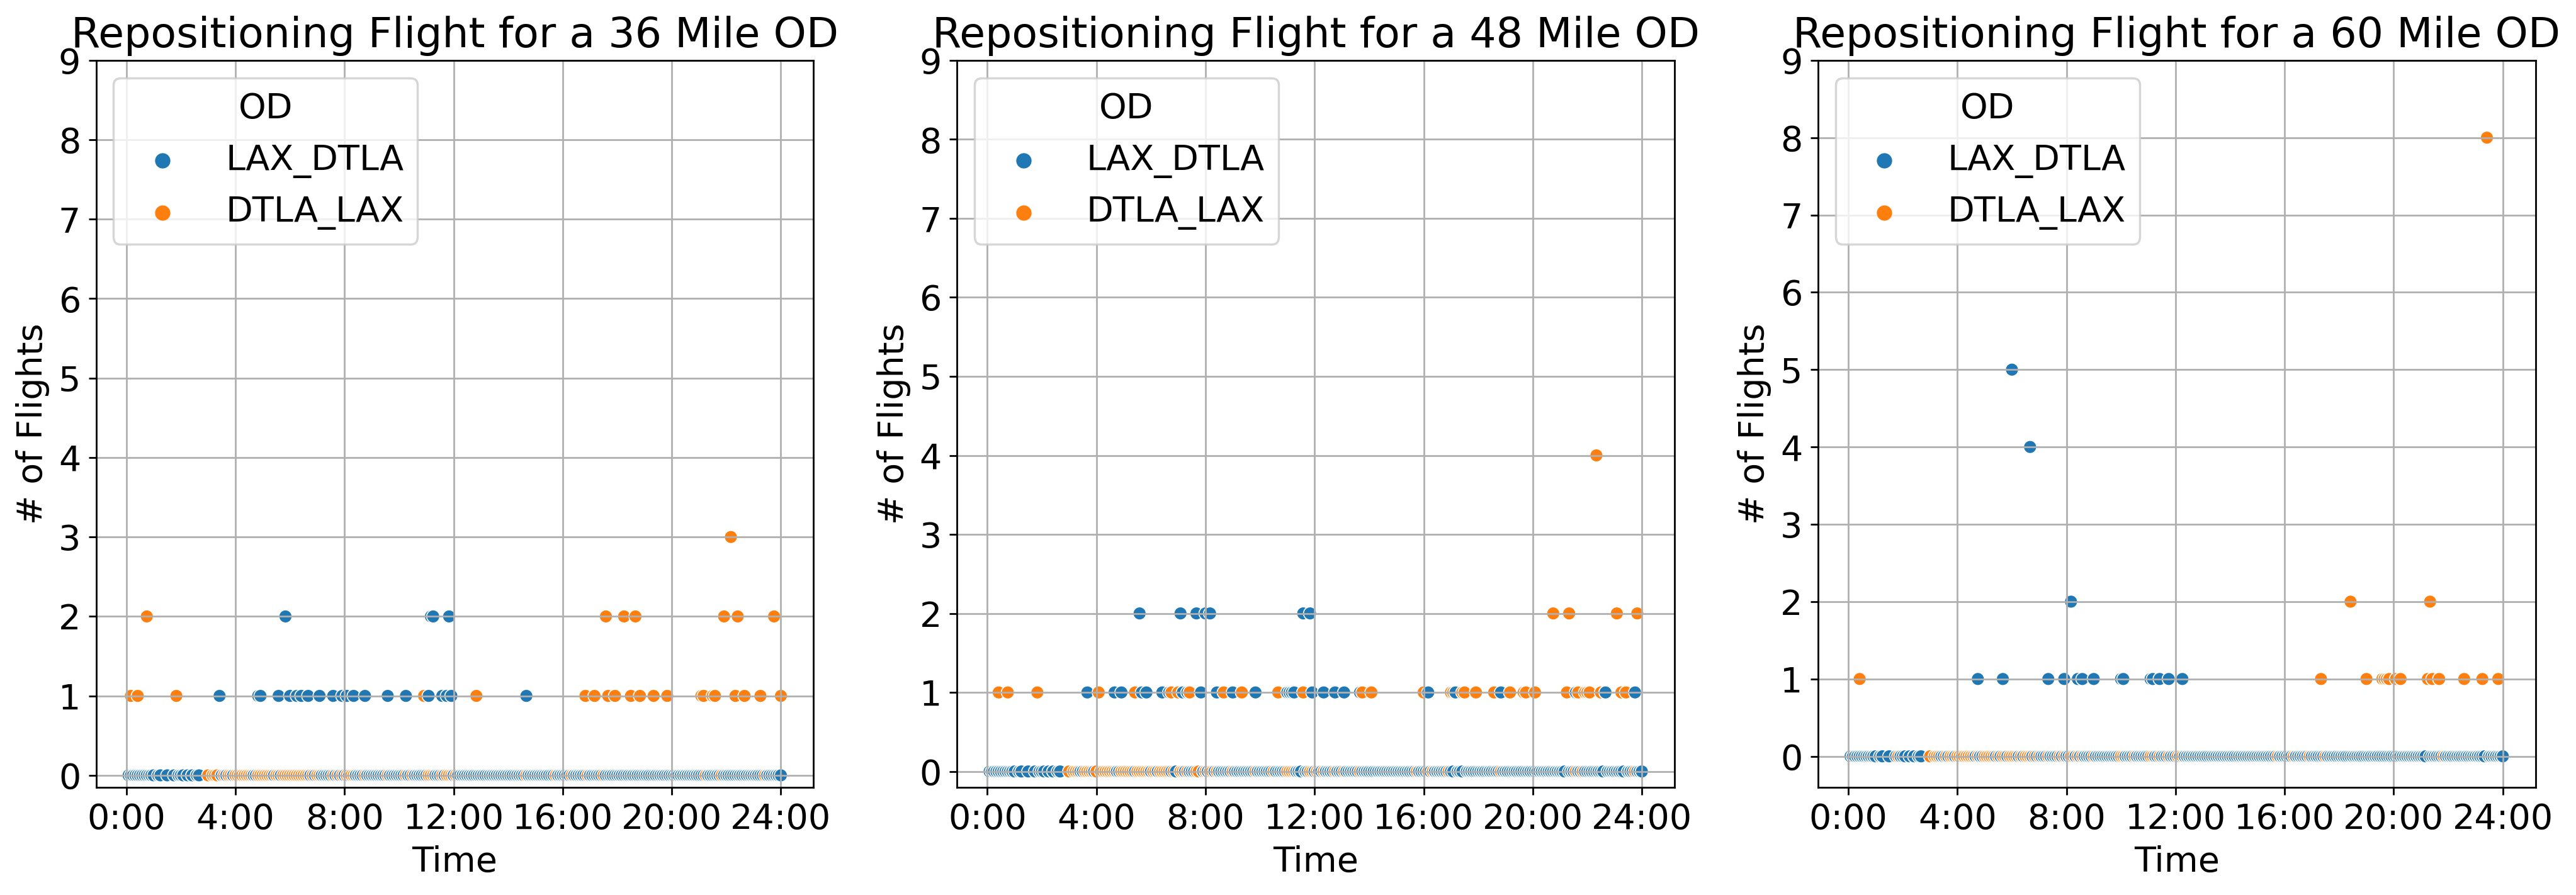

In [69]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(20,6), ncols=3)
sns.scatterplot(merged36, x='t', y='repo', hue='i', ax=ax[0])
sns.scatterplot(merged48, x='t', y='repo', hue='i', ax=ax[1])
sns.scatterplot(merged60, x='t', y='repo', hue='i', ax=ax[2])
for i in range(3):
       ax[i].set(xlabel='Time',
              ylabel='# of Flights',
              yticks=np.arange(0,10),
              xticks=np.arange(0,288+12*4, 12*4),
              xticklabels = [str(i)+':00' for i in range(0, 28, 4)])
       ax[i].grid()
       ax[i].legend(title='OD', loc='upper left')
ax[0].set(title='Repositioning Flight for a 36 Mile OD')
ax[1].set(title='Repositioning Flight for a 48 Mile OD')
ax[2].set(title='Repositioning Flight for a 60 Mile OD')


plt.gcf().set_dpi(250)



# Hypothetical Flight Distance

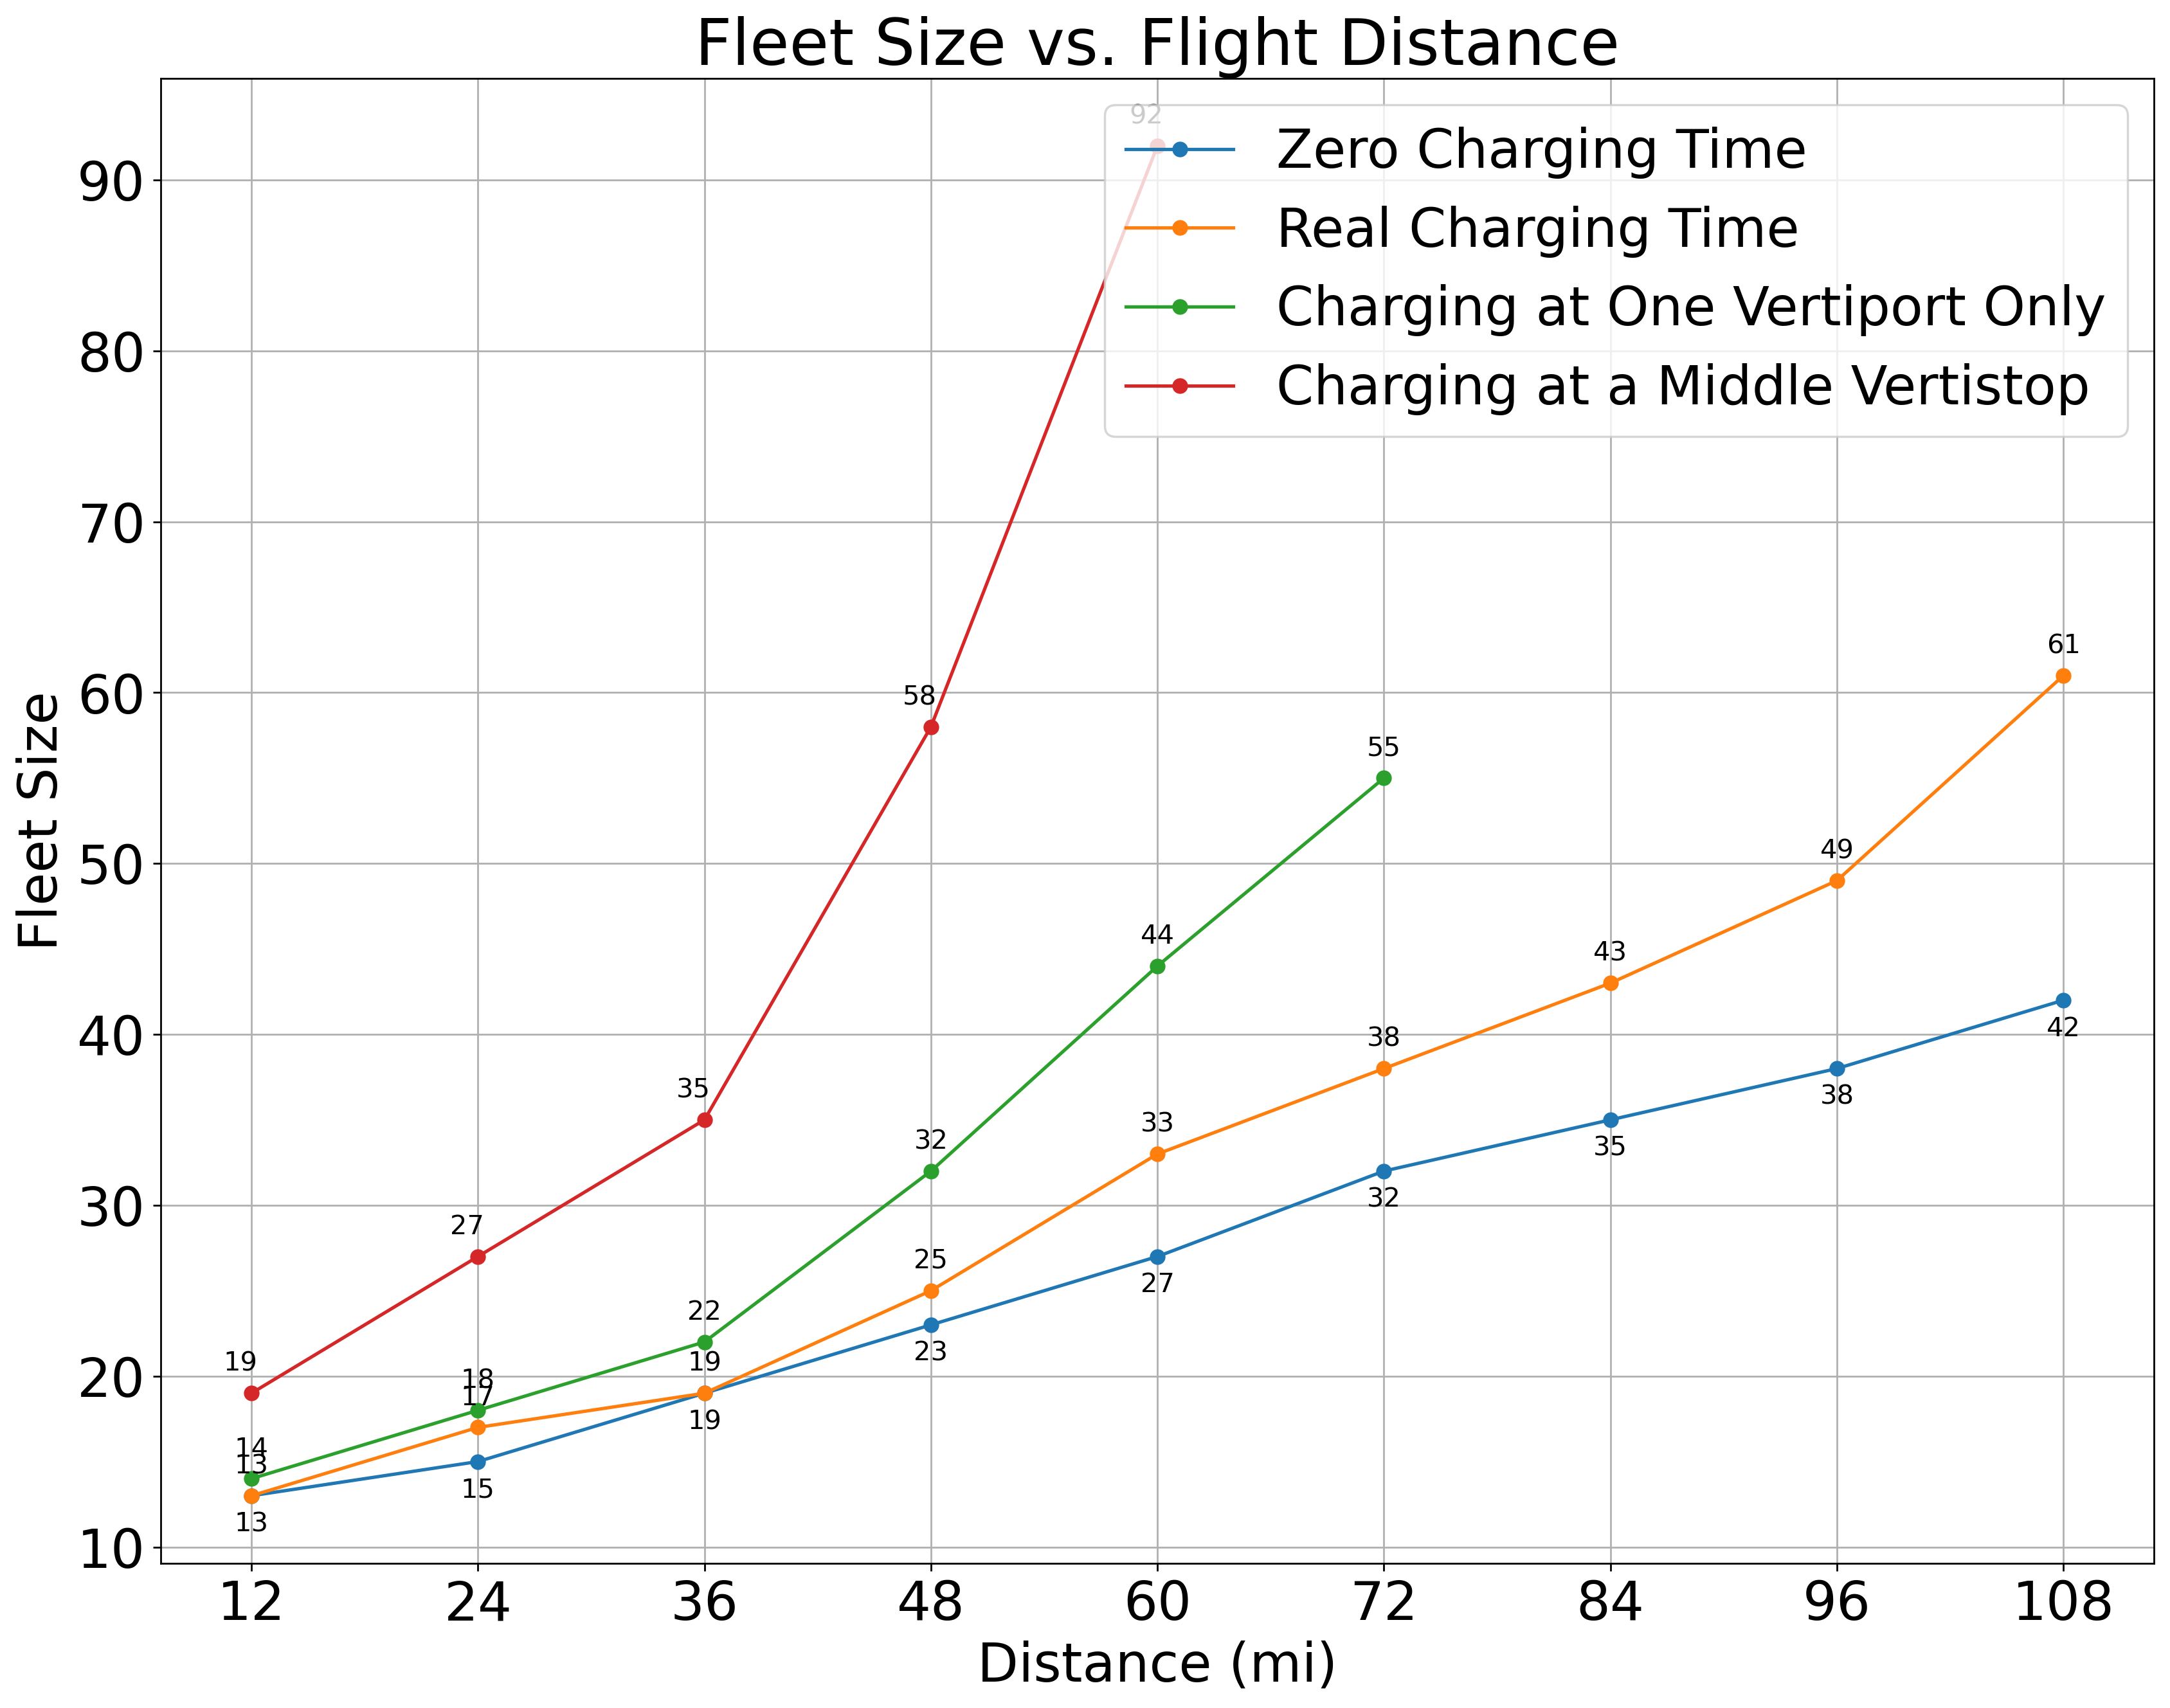

In [103]:
zero_charge = [13,15,19,23,27,32,35,38,42]
real_charge = [13,17,19,25,33,38,43,49,61]
dtla_charge = [14,18,22,32,44,55]
mid = [19,27,35,58,92]
plt.rcParams.update({'font.size': 24})
fig, ax = plt.subplots(figsize=(16,12))
ax.plot(np.arange(12,120,12), zero_charge, marker='o',
         label='Zero Charging Time')
ax.plot(np.arange(12,120,12), real_charge, marker='o',
         label='Real Charging Time')
ax.plot(np.arange(12,84,12), dtla_charge, marker='o',
         label='Charging at One Vertiport Only')
ax.plot(np.arange(12,72,12), mid, marker='o',
         label='Charging at a Middle Vertistop')

for i in range(len(zero_charge)):
    plt.annotate(zero_charge[i], (np.arange(12,120,12)[i], zero_charge[i]), textcoords="offset points", xytext=(0,-16), ha='center', fontsize=12)
for i in range(len(real_charge)):
    plt.annotate(real_charge[i], (np.arange(12,120,12)[i], real_charge[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)
for i in range(len(dtla_charge)):
    plt.annotate(dtla_charge[i], (np.arange(12,84,12)[i], dtla_charge[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)
for i in range(len(mid)):
    plt.annotate(mid[i], (np.arange(12,72,12)[i], mid[i]), textcoords="offset points", xytext=(-5,10), ha='center', fontsize=12)
ax.set(xlabel='Distance (mi)',
       ylabel='Fleet Size',
       xticks=np.arange(12,120,12),
       title='Fleet Size vs. Flight Distance')
plt.grid()
plt.legend()
plt.gcf().set_dpi(250)


# Import Helper Functions

In [3]:
import model.ParseLP
importlib.reload(model.ParseLP)
from model.ParseLP import convert2df, calculate_num_aircrafts

In [51]:

output_file = 'trb/schedule_5min_2000pax_0713'
# output_file = 'charge_to_full_after_each_flight'
specificn, specificu, specificc = convert2df(output_file)


In [52]:
4000/specificu['amount'].sum()

3.316749585406302

In [5]:
# Obtain Airport Specific Aircraft States
specificu01 = specificu[specificu['i'] == 0].reset_index(drop=True)
specificu10 = specificu[specificu['i'] == 1].reset_index(drop=True)

specificc01 = specificc[specificc['i'] == 0].reset_index(drop=True)
specificc10 = specificc[specificc['i'] == 1].reset_index(drop=True)

specificn01 = specificn[specificn['i'] == 0].reset_index(drop=True)
specificn10 = specificn[specificn['i'] == 1].reset_index(drop=True)

In [6]:
lax_all_c, lax_all_n, lax_all_u = calculate_num_aircrafts(specificc01, specificu01, specificn01)
dtla_all_c, dtla_all_n, dtla_all_u = calculate_num_aircrafts(specificc10, specificu10, specificn10)
all_c, all_n, all_u = calculate_num_aircrafts(specificc, specificu, specificn)

In [7]:
specificc['group'] = specificc['t'] // 48

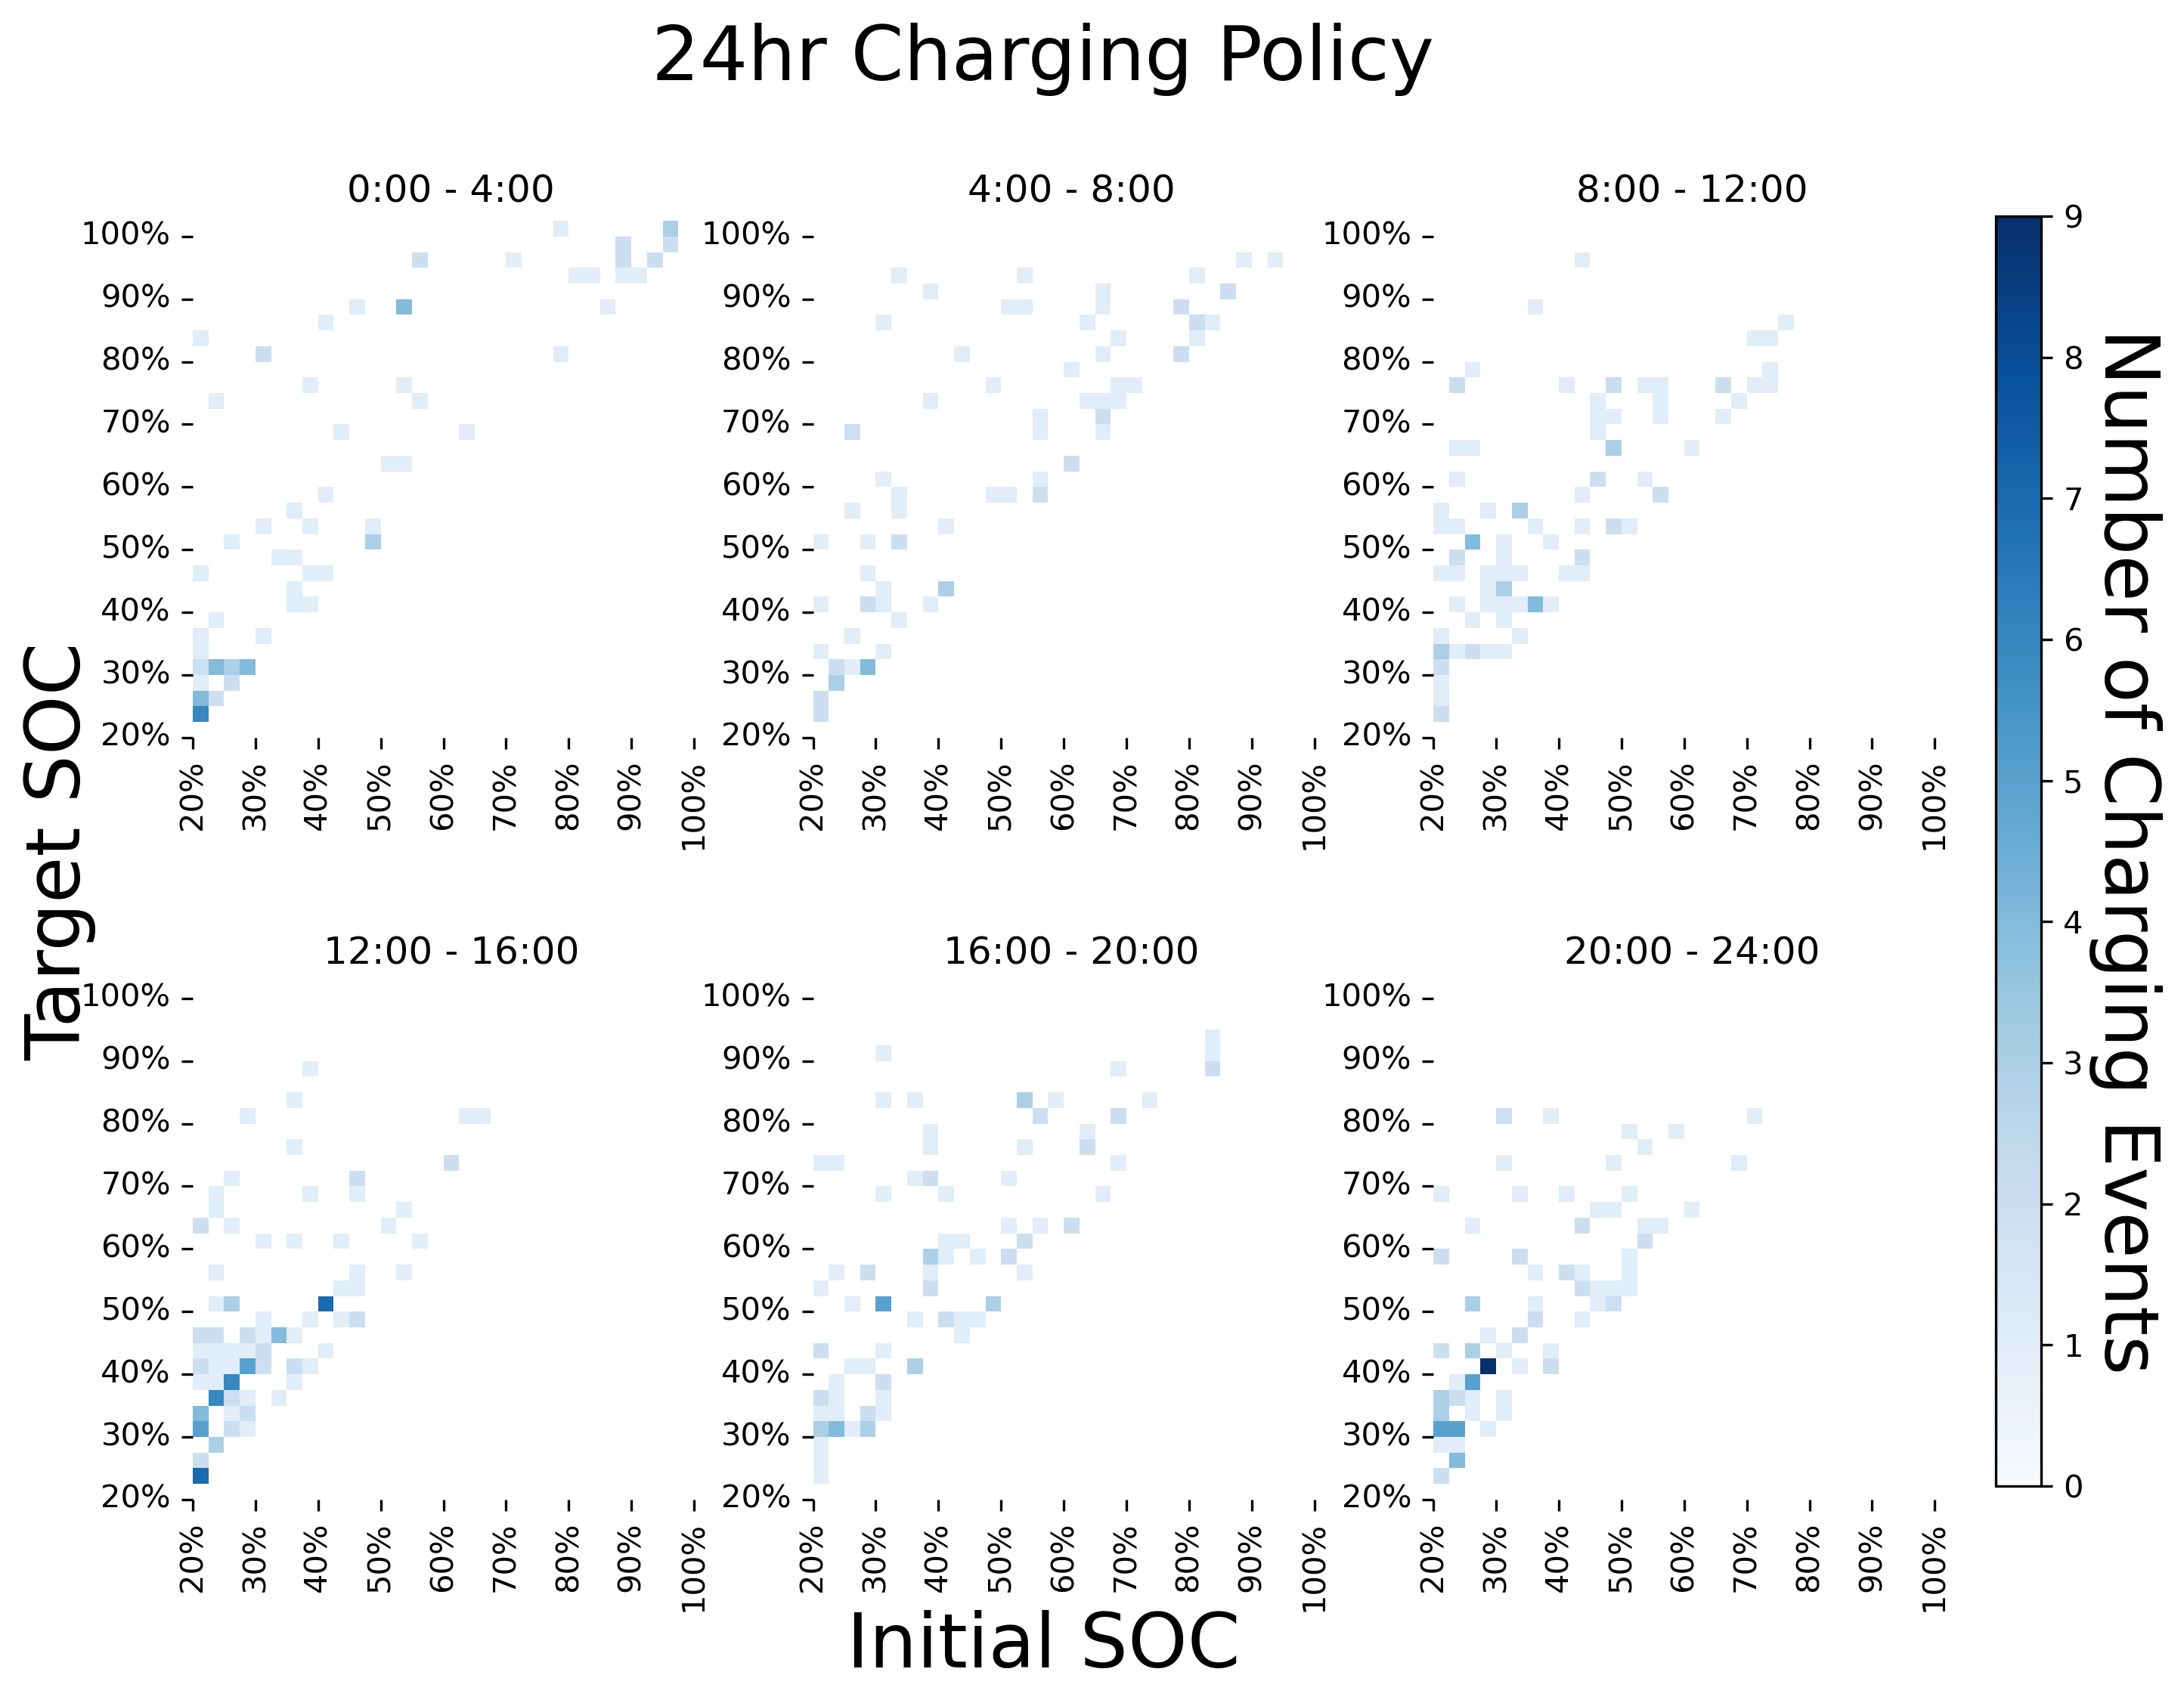

In [29]:
plt_idx1 = 0
plt_idx2 = 0

fig, ax = plt.subplots(figsize=(10,8), ncols=3, nrows=2)
for j in range(0,6):
    check = specificc[specificc['group'] == j].reset_index(drop=True)
    heat_array = np.zeros(shape=(33,33))
    for i in range(check.shape[0]):
        idx1 = check['x'][i]
        idx2 = check['y'][i]
        amount = check['amount'][i]
        heat_array[idx1, idx2] += amount
    heat_array = heat_array.T
    

    mask = np.triu(np.ones_like(heat_array, dtype=bool))
    sns.heatmap(heat_array, cmap=custom_cmap, 
                mask=mask, square=True,
                vmin=0, vmax=9, ax=ax[plt_idx1, plt_idx2])
    ax[plt_idx1,plt_idx2].invert_yaxis()
    ax[plt_idx1,plt_idx2].collections[0].colorbar.remove()
    ax[plt_idx1,plt_idx2].set(title=f'{j*4}:00 - {j*4+4}:00',
                              xticks=np.arange(0,36,4),
                              xticklabels=[str(int(i*2.5+20))+'%' for i in np.arange(0,36,4)],
                              yticks=np.arange(0,36,4),
                              yticklabels=[str(int(i*2.5+20))+'%' for i in np.arange(0,36,4)])

    if plt_idx2 == 2:
        plt_idx2 = 0
        plt_idx1 += 1
    else:
        plt_idx2 += 1

fig.text(0.5, 0.05, 'Initial SOC', ha='center', fontsize=24)
fig.text(0.5, 0.925, '24hr Charging Policy', ha='center', fontsize=24)
fig.text(0.05, 0.5, 'Target SOC', va='center', rotation='vertical', fontsize=24)


cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = plt.colorbar(ax[0, 0].collections[0], cax=cax, orientation='vertical')
cbar.set_label('Number of Charging Events', rotation=270, fontsize=24,labelpad=25)
plt.gcf().set_dpi(300);



In [24]:

import matplotlib.colors as mcolors
colors_with_alpha = plt.cm.Blues(np.linspace(0, 1, 256))
# starting from 1
# colors_with_alpha[:, 3] = np.linspace(0, 1, 256)
# starting form 0
colors_with_alpha[0, 3] = 0  
custom_cmap = mcolors.ListedColormap(colors_with_alpha)



In [8]:
scheduled_flight = specificu.groupby(['t', 'i'])['amount'].sum().reset_index()
scheduled_flight['hr'] = np.ceil(scheduled_flight['t'] / 12)
scheduled_flight = scheduled_flight.groupby(['hr', 'i'])['amount'].sum().reset_index()

In [9]:
constraint = pd.read_csv('../input/schedule_5min_0612.csv')
constraint['hr'] = constraint['schedule'] // 60
constraint = constraint.groupby(['hr', 'od']).count().reset_index()
constraint['hr'] += 1

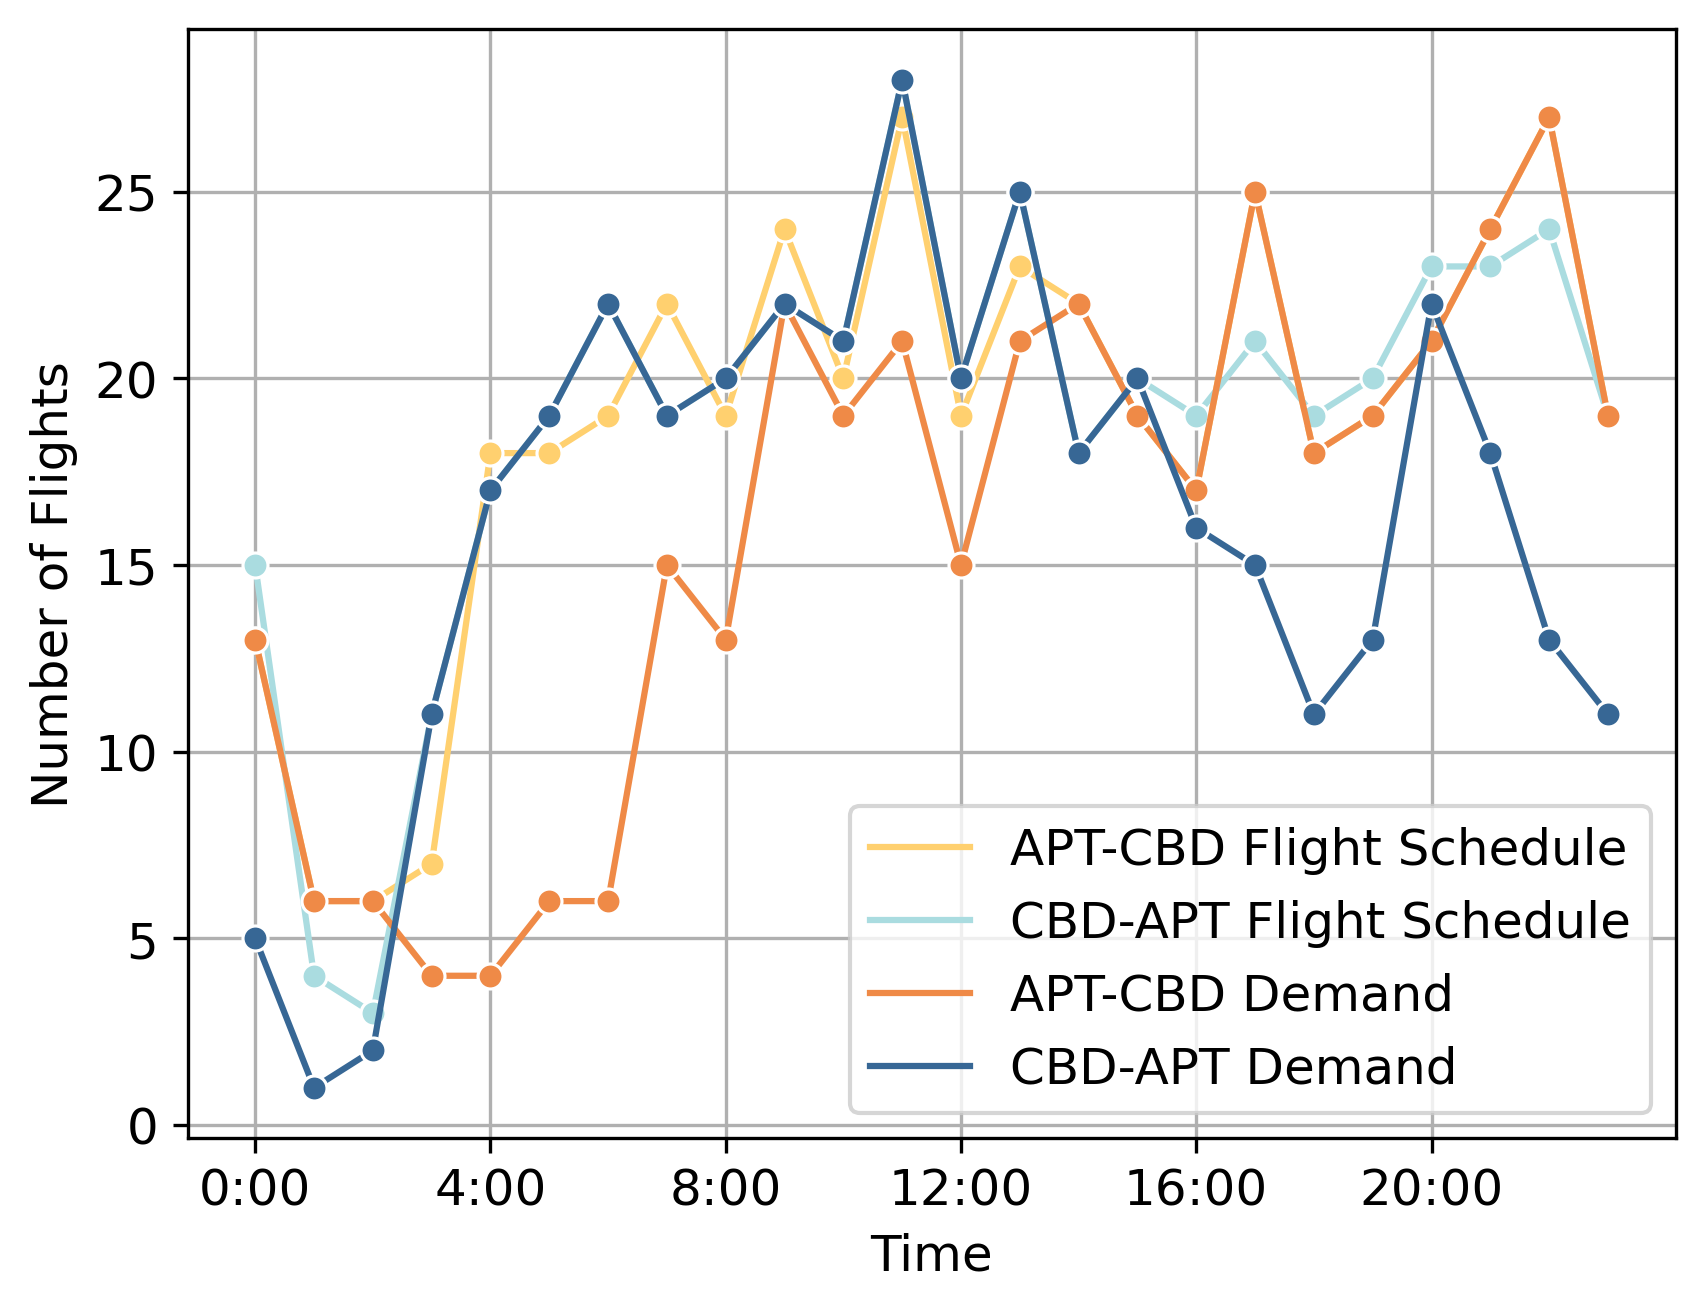

In [12]:
plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots()
sns.lineplot(data=scheduled_flight, x='hr', y='amount', hue='i', marker='o',
             palette=['#ffd06f','#aadce0'], hue_order=[0,1], ax=ax)
sns.lineplot(data=constraint, x='hr', y='schedule', hue='od', marker='o',
             palette=['#ef8a47','#376795'], hue_order=['LAX_DTLA', 'DTLA_LAX'], ax=ax)

handles, labels = plt.gca().get_legend_handles_labels()
labels_custom = ['APT-CBD Flight Schedule', 'CBD-APT Flight Schedule',
                 'APT-CBD Demand', 'CBD-APT Demand',]
plt.legend(handles, labels_custom,title='', loc='lower right')
ax.set(xticks = np.arange(1, 25, 4), xticklabels=[str(i)+':00' for i in np.arange(0,23,4)],
       xlabel='Time', ylabel='Number of Flights')
plt.grid();
plt.gcf().set_dpi(300);


# State Visulization

In [247]:
def visualize_state(c, u, n, ax, title, x0=0, x1=291, specific_airport=True):
    # sns.lineplot(c.sum(axis=0)[x0:x1], label='Charging', marker='o', ax=ax)
    sns.lineplot(u.sum(axis=0)[x0:x1], label='In Flight', marker='o', ax=ax)
    # sns.lineplot(n.sum(axis=0)[x0:x1], label='Idling', marker='o', ax=ax)
    if specific_airport:
        sns.lineplot((c.sum(axis=0)[x0:x1] + n.sum(axis=0)[x0:x1]), label='On the Ground',marker='o', ax=ax)
    else:
        sns.lineplot((c.sum(axis=0)[x0:x1] + u.sum(axis=0)[x0:x1] + n.sum(axis=0)[x0:x1]), label='Total', marker='o', ax=ax)
    ax.set(title=title,
        ylabel='# of Aircrafts',
        xticks=np.concatenate([np.array([0,1]), np.arange(1,300, 24)]),
        xticklabels=['','']+[str(i)+':00' for i in range(0,25,2)],
        ylim=(0,90))
    ax.grid()
    ax.legend(loc='upper center')

In [300]:
print('Number of pads needed at LAX:', np.max((lax_all_c.sum(axis=0)[0:291] + lax_all_n.sum(axis=0)[:291])))
print('Number of pads needed at DTLA:', np.max((dtla_all_c.sum(axis=0)[0:291] + dtla_all_n.sum(axis=0)[:291])))

Number of pads needed at LAX: 52.0
Number of pads needed at DTLA: 82.0


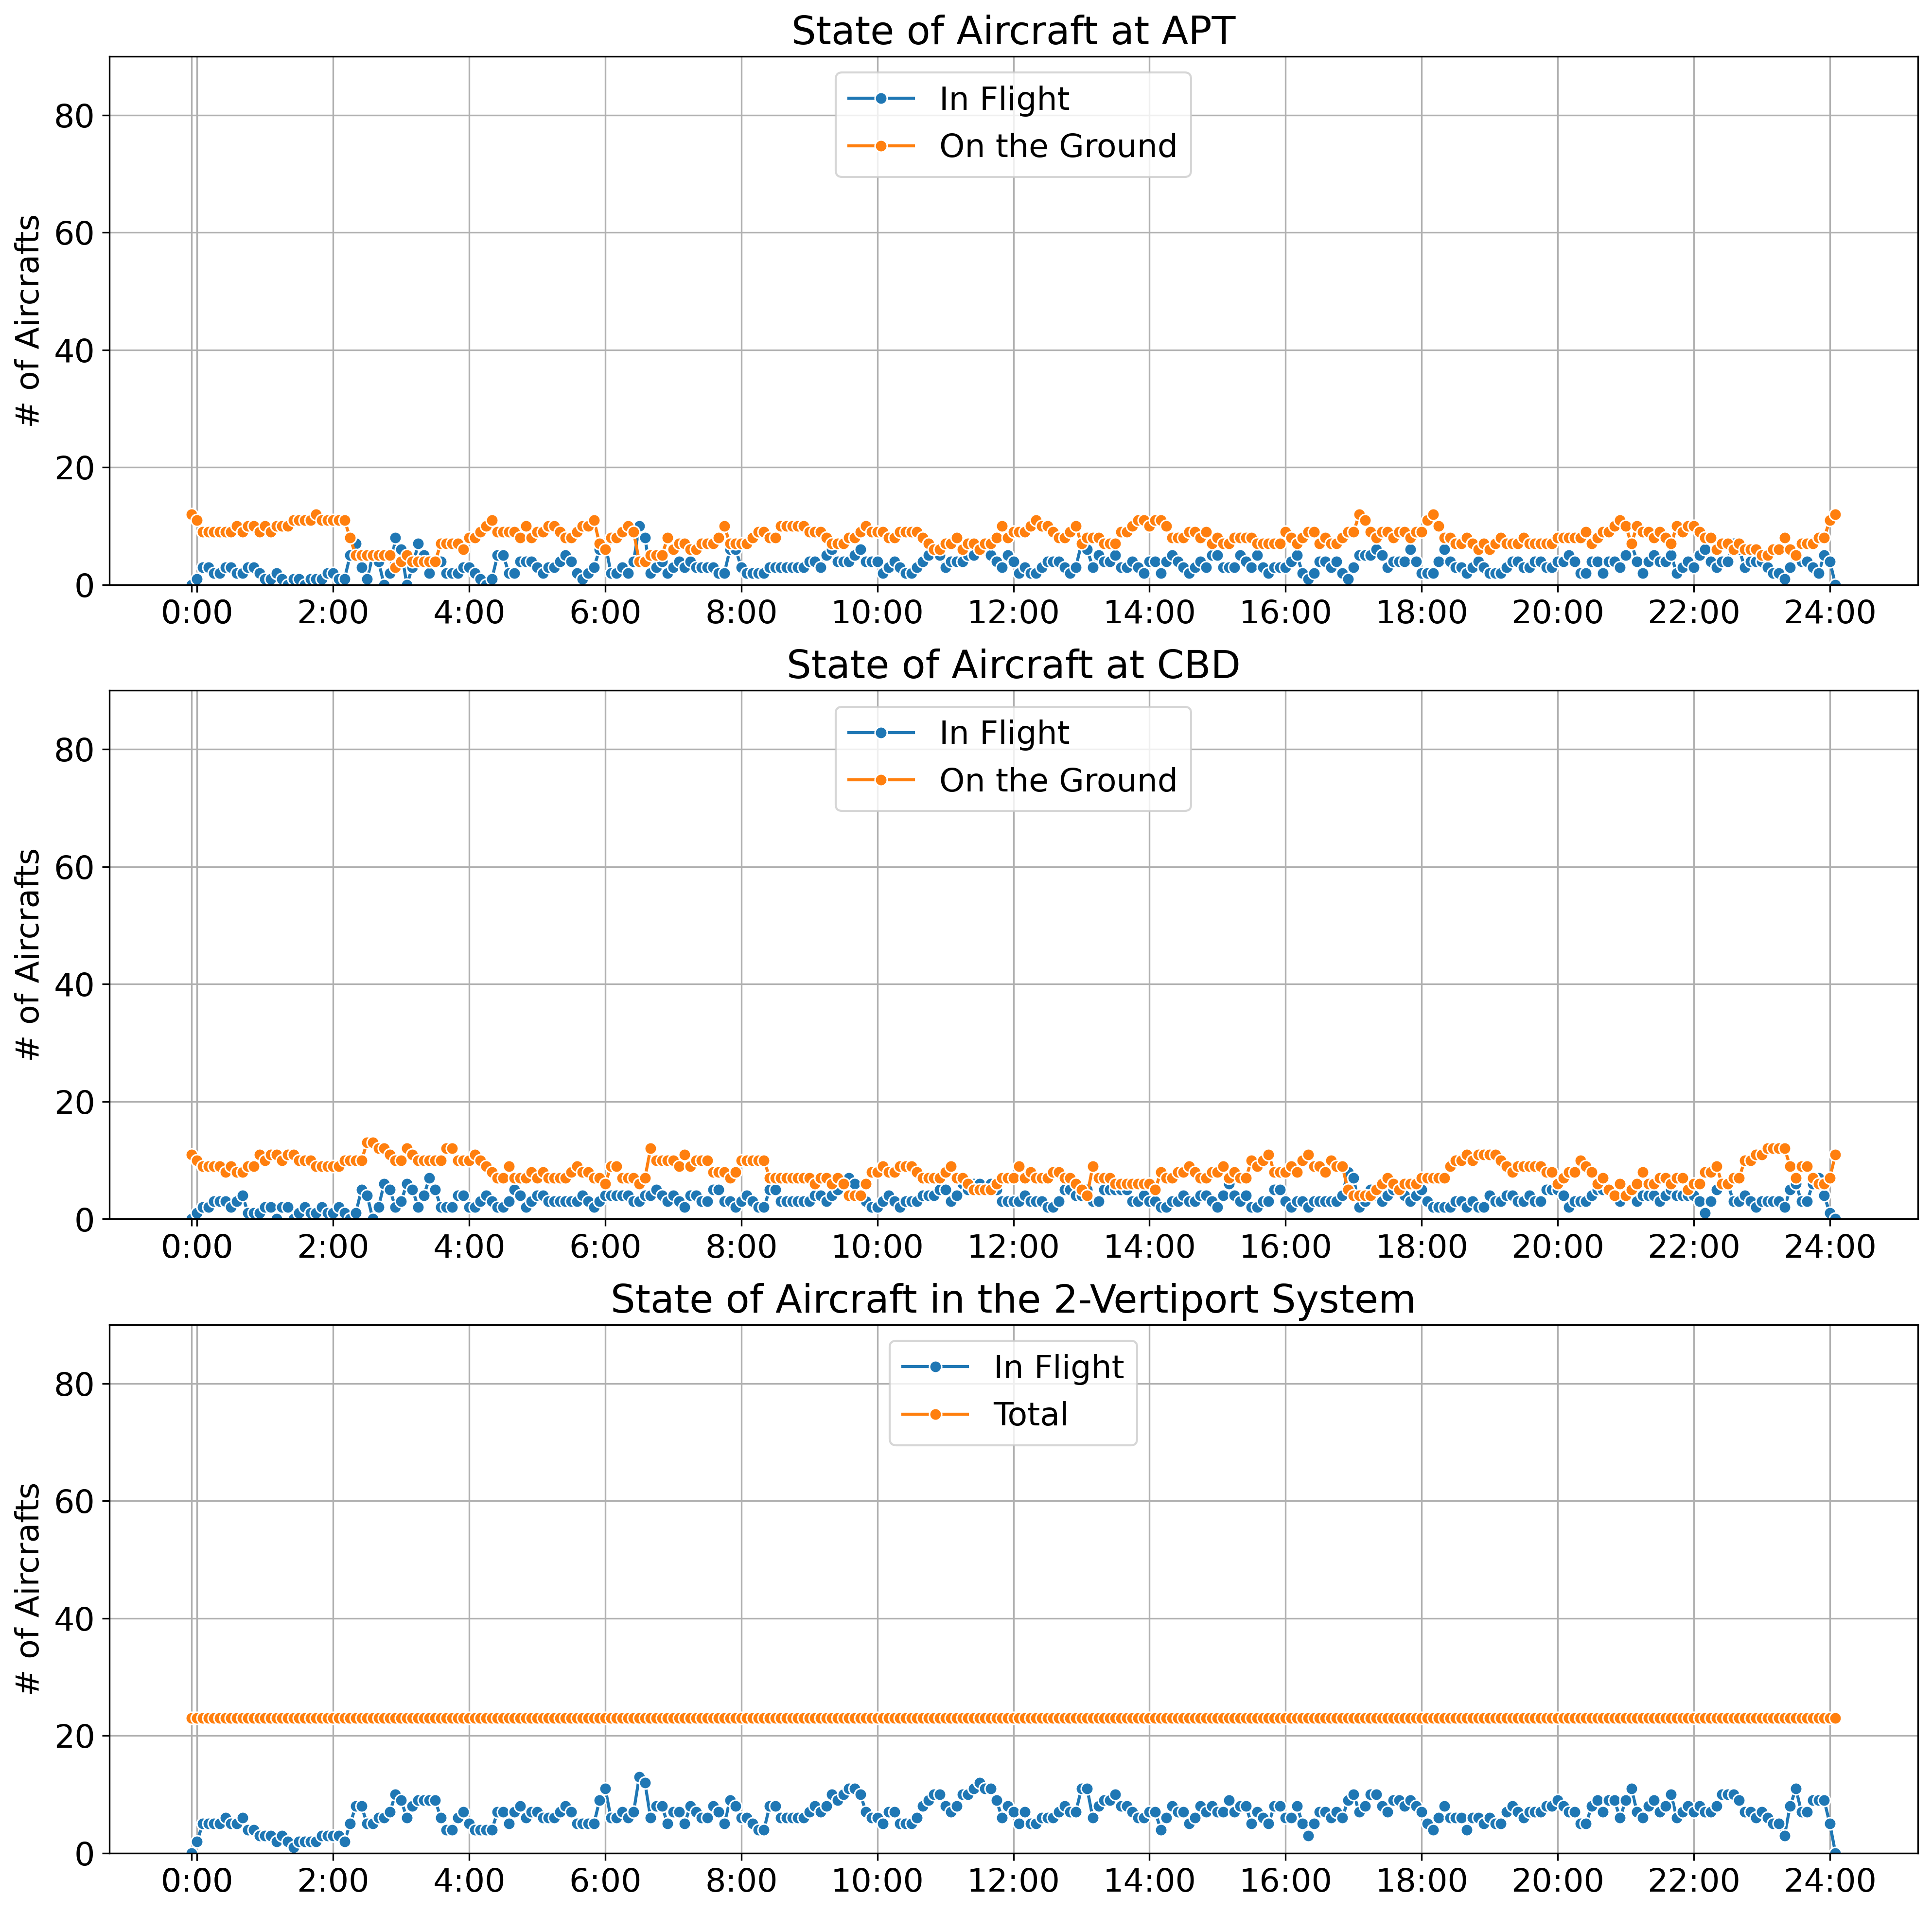

In [272]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(16,16), nrows=3)
visualize_state(lax_all_c, lax_all_u, lax_all_n, ax[0], 'State of Aircraft at APT')
visualize_state(dtla_all_c, dtla_all_u, dtla_all_n, ax[1], 'State of Aircraft at CBD')
visualize_state(all_c, all_u, all_n, ax[2], 'State of Aircraft in the 2-Vertiport System', specific_airport=False)
plt.gcf().set_dpi(300);


# Compute System Metric

In [179]:
sce = pd.read_csv('../input/schedule_5min_0612.csv')
sce = sce.sort_values('schedule').reset_index(drop=True)
sce['schedule'] = sce['schedule'] // 5 + 1


In [166]:
gamma = np.array([0.0129,0.0133,0.0137,0.0142,0.0147,
                    0.0153,0.0158,0.0166,0.0172,0.018,
                    0.0188,0.0197,0.0207,0.0219,0.0231,
                    0.0245,0.026,0.0278,0.03,0.0323,
                    0.0351,0.0384,0.0423,0.0472,0.0536,
                    0.0617,0.0726,0.0887,0.1136,0.1582,
                    0.2622,0.9278,])*60, 

In [201]:
t = sce['schedule'].to_numpy()
od = sce['schedule'].to_numpy()

In [214]:
aircraft = np.array([[1,1,1,1,1,1],[0,0,0,0,0,0]])
aircraft

array([[1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0]])

In [210]:
sce[sce['schedule'] == i]

,schedule,od
0,1.0,LAX_DTLA


In [224]:
(aircraft[0,:] <= i) & (aircraft[1,:] == 0)

array([ True,  True,  True,  True,  True,  True])

In [ ]:
class aircraft:
    def __init__(self):
        self.state='avaliable'
        self.soc=32       
    def flight(self):
        self.state = 'unavaliable'
        self.task = 2
    def charge(self):
        self.state = 'unavaliable'
        self.charging_time = np.ceiling(np.sum(gamma[self.soc:])/5)

    def update(self):
        if self.flight > 0:
            self.flight -= 1
            self.soc -= 1
        elif self.charging_time > 0:
            self.charging_time -= 1
        
        if (self.flight) == 0 & (self.charging_time) == 0 & (self.soc == 32):
            self.state = 'avaliable'